In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import time
import os
from joblib import Memory
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Base_Path = "/content/drive/MyDrive/capstone_project_fire_risk"

In [ ]:
import os

print(f"Current working directory: {os.getcwd()}")
os.chdir(Base_Path)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /content/drive/My Drive/capstone_project_fire_risk
Current working directory: /content/drive/MyDrive/capstone_project_fire_risk


In [ ]:
uef_df= gpd.read_file(f'{Base_Path}/uniteevaluationfonciere/uniteevaluationfonciere.shp', encoding='utf-8')

In [ ]:
uef_df.columns

Index(['ID_UEV', 'CIVIQUE_DE', 'CIVIQUE_FI', 'NOM_RUE', 'SUITE_DEBU',
       'MUNICIPALI', 'ETAGE_HORS', 'NOMBRE_LOG', 'ANNEE_CONS', 'CODE_UTILI',
       'LETTRE_DEB', 'LETTRE_FIN', 'LIBELLE_UT', 'CATEGORIE_', 'MATRICULE8',
       'SUPERFICIE', 'SUPERFIC_1', 'NO_ARROND_', 'geometry'],
      dtype='object')

In [ ]:
# Define the variables for the different columns
UEV_ID = 'UEV_ID'
CIVIC_START = 'CVC_START'
CIVIC_END = 'CVC_END'
STREET_NAME = 'STR_NAME'
UNIT_NUMBER_START = 'UNIT_START'
FLOORS_ABOVE_GROUND = 'FLRS_AGND'
NUMBER_OF_UNITS = 'NBR_UNITS'
CONSTRUCTION_YEAR = 'CONS_YEAR'
USE_CODE = 'USE_CODE'
LAND_START = 'L_START'
LAND_END = 'L_END'
USE_DESCRIPTION = 'USE_DES'
UEF_CATEGORY = 'UEF_CAT'
LAND_ROLL_NUMBER = 'LR_NBR'
LAND_AREA = 'LAND_A'
BUILDING_AREA = 'BLD_AREA'
BUILDING_AGE = 'BLD_AGE'
DISTRICT_ID = 'DIST_ID'
MUNICIPALITY_CODE = 'MUNI_CODE'
MUNICIPALITY_NAME = 'MUNI_NAME'
USE_CATEGORY = 'USE_CAT'
GEOMETRY = 'geometry'
AGE_GROUP = 'AGE_GR'

In [ ]:
french_to_english_column_names = {
    'ID_UEV': UEV_ID,
    'CIVIQUE_DE': CIVIC_START,
    'CIVIQUE_FI': CIVIC_END,
    'NOM_RUE': STREET_NAME,
    'SUITE_DEBU': UNIT_NUMBER_START,
    'ETAGE_HORS': FLOORS_ABOVE_GROUND,
    'NOMBRE_LOG': NUMBER_OF_UNITS,
    'ANNEE_CONS': CONSTRUCTION_YEAR,
    'CODE_UTILI': USE_CODE,
    'LETTRE_DEB': LAND_START,
    'LETTRE_FIN': LAND_END,
    'LIBELLE_UT': USE_DESCRIPTION,
    'CATEGORIE_': UEF_CATEGORY,
    'MATRICULE8': LAND_ROLL_NUMBER,
    'SUPERFICIE': LAND_AREA,
    'SUPERFIC_1': BUILDING_AREA,
    'NO_ARROND_': DISTRICT_ID,
    'MUNICIPALI': MUNICIPALITY_CODE
}

uef_df = uef_df.rename(columns=french_to_english_column_names)

In [ ]:
# @title
uef_df_no_floor_data = uef_df[uef_df[FLOORS_ABOVE_GROUND].isnull()]
print(uef_df_no_floor_data.head())
len(uef_df_no_floor_data)

      UEV_ID CVC_START CVC_END                         STR_NAME UNIT_START  \
0   01038405      3577    3577        avenue Atwater  (MTL+WMT)       None   
16  01034376      1487    1495  avenue du Mont-Royal Est  (MTL)       None   
24  01036037       520     520     rue Sainte-Marguerite  (MTL)       None   
28  05024759     99999   99999          avenue Viger Est  (MTL)       None   
42  01043965      3780    3780     boulevard LaSalle  (LSL+VRD)       None   

   MUNI_CODE  FLRS_AGND  NBR_UNITS  CONS_YEAR USE_CODE L_START L_END  \
0         50        NaN        NaN       1983     1921    None  None   
16        50        NaN        2.0       1921     1000    None  None   
24        50        NaN        NaN       1959     5010    None  None   
28        50        NaN        NaN       9999     9100    None  None   
42        50        NaN        NaN       1987     1922    None  None   

                                              USE_DES      UEF_CAT  \
0                     Statio

49830

<Axes: >

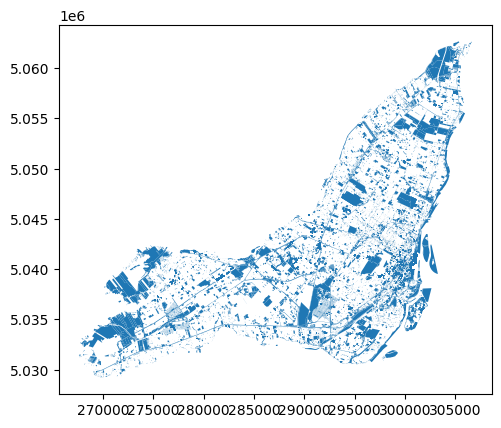

In [ ]:
uef_df_no_floor_data.plot()

ID_UEV          object
CIVIQUE_DE      object
CIVIQUE_FI      object
NOM_RUE         object
SUITE_DEBU      object
MUNICIPALI      object
ETAGE_HORS     float64
NOMBRE_LOG     float64
ANNEE_CONS       int64
CODE_UTILI      object
LETTRE_DEB      object
LETTRE_FIN      object
LIBELLE_UT      object
CATEGORIE_      object
MATRICULE8      object
SUPERFICIE       int64
SUPERFIC_1     float64
NO_ARROND_      object
geometry      geometry
dtype: object


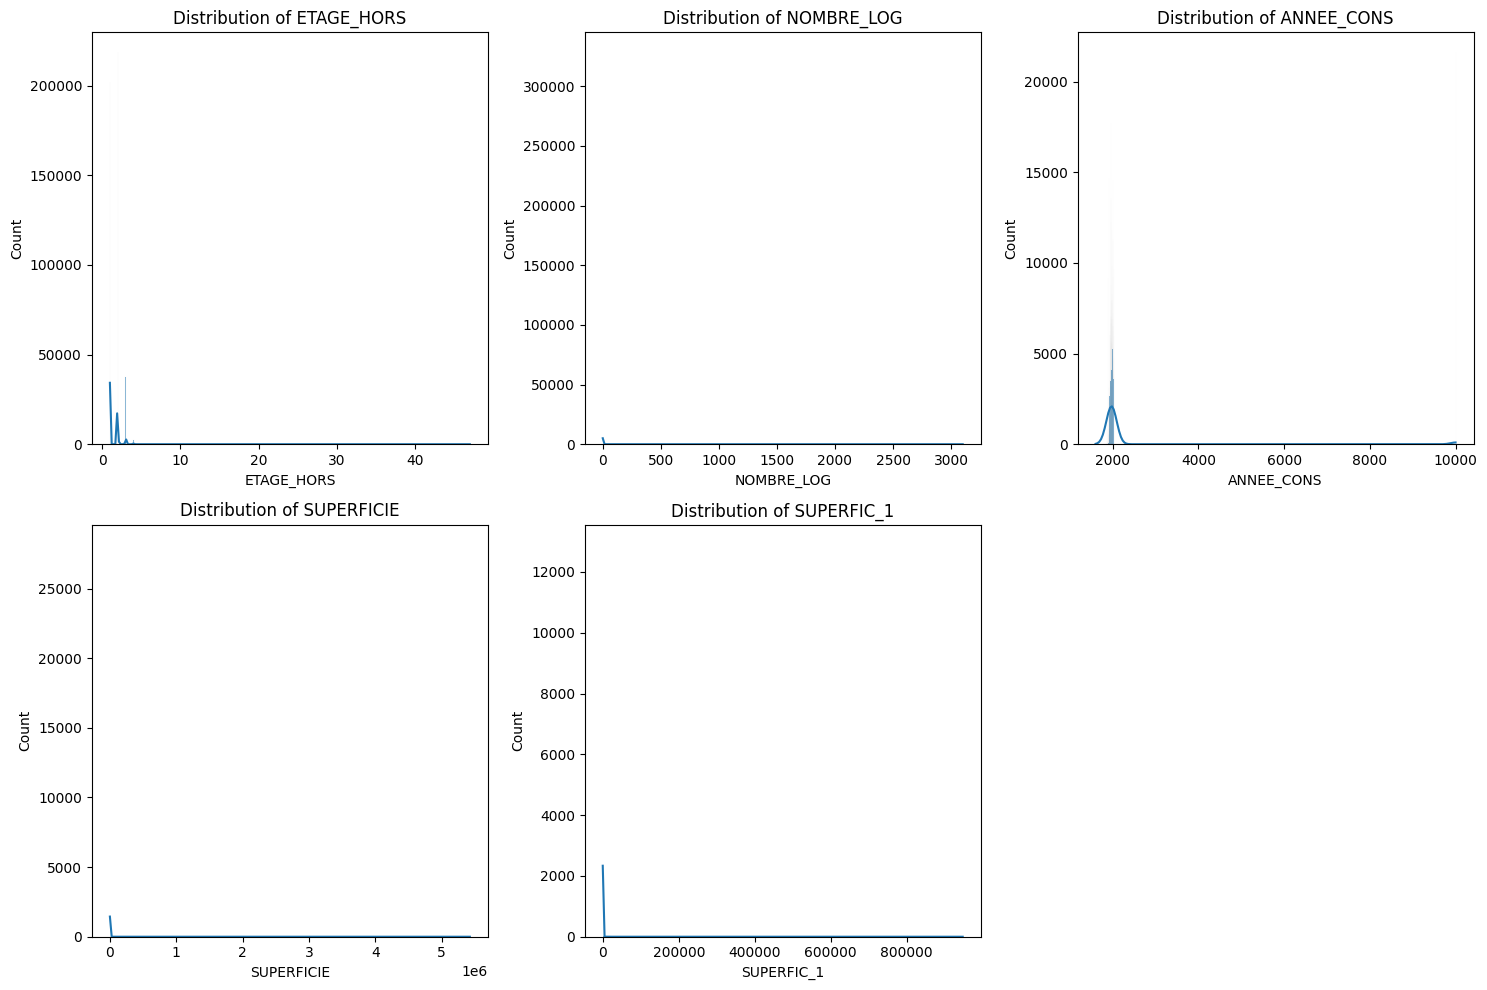

Skipping ID_UEV due to high cardinality
Skipping CIVIQUE_DE due to high cardinality
Skipping CIVIQUE_FI due to high cardinality
Skipping NOM_RUE due to high cardinality
Skipping SUITE_DEBU due to high cardinality
Skipping CODE_UTILI due to high cardinality
Skipping LIBELLE_UT due to high cardinality
Skipping MATRICULE8 due to high cardinality


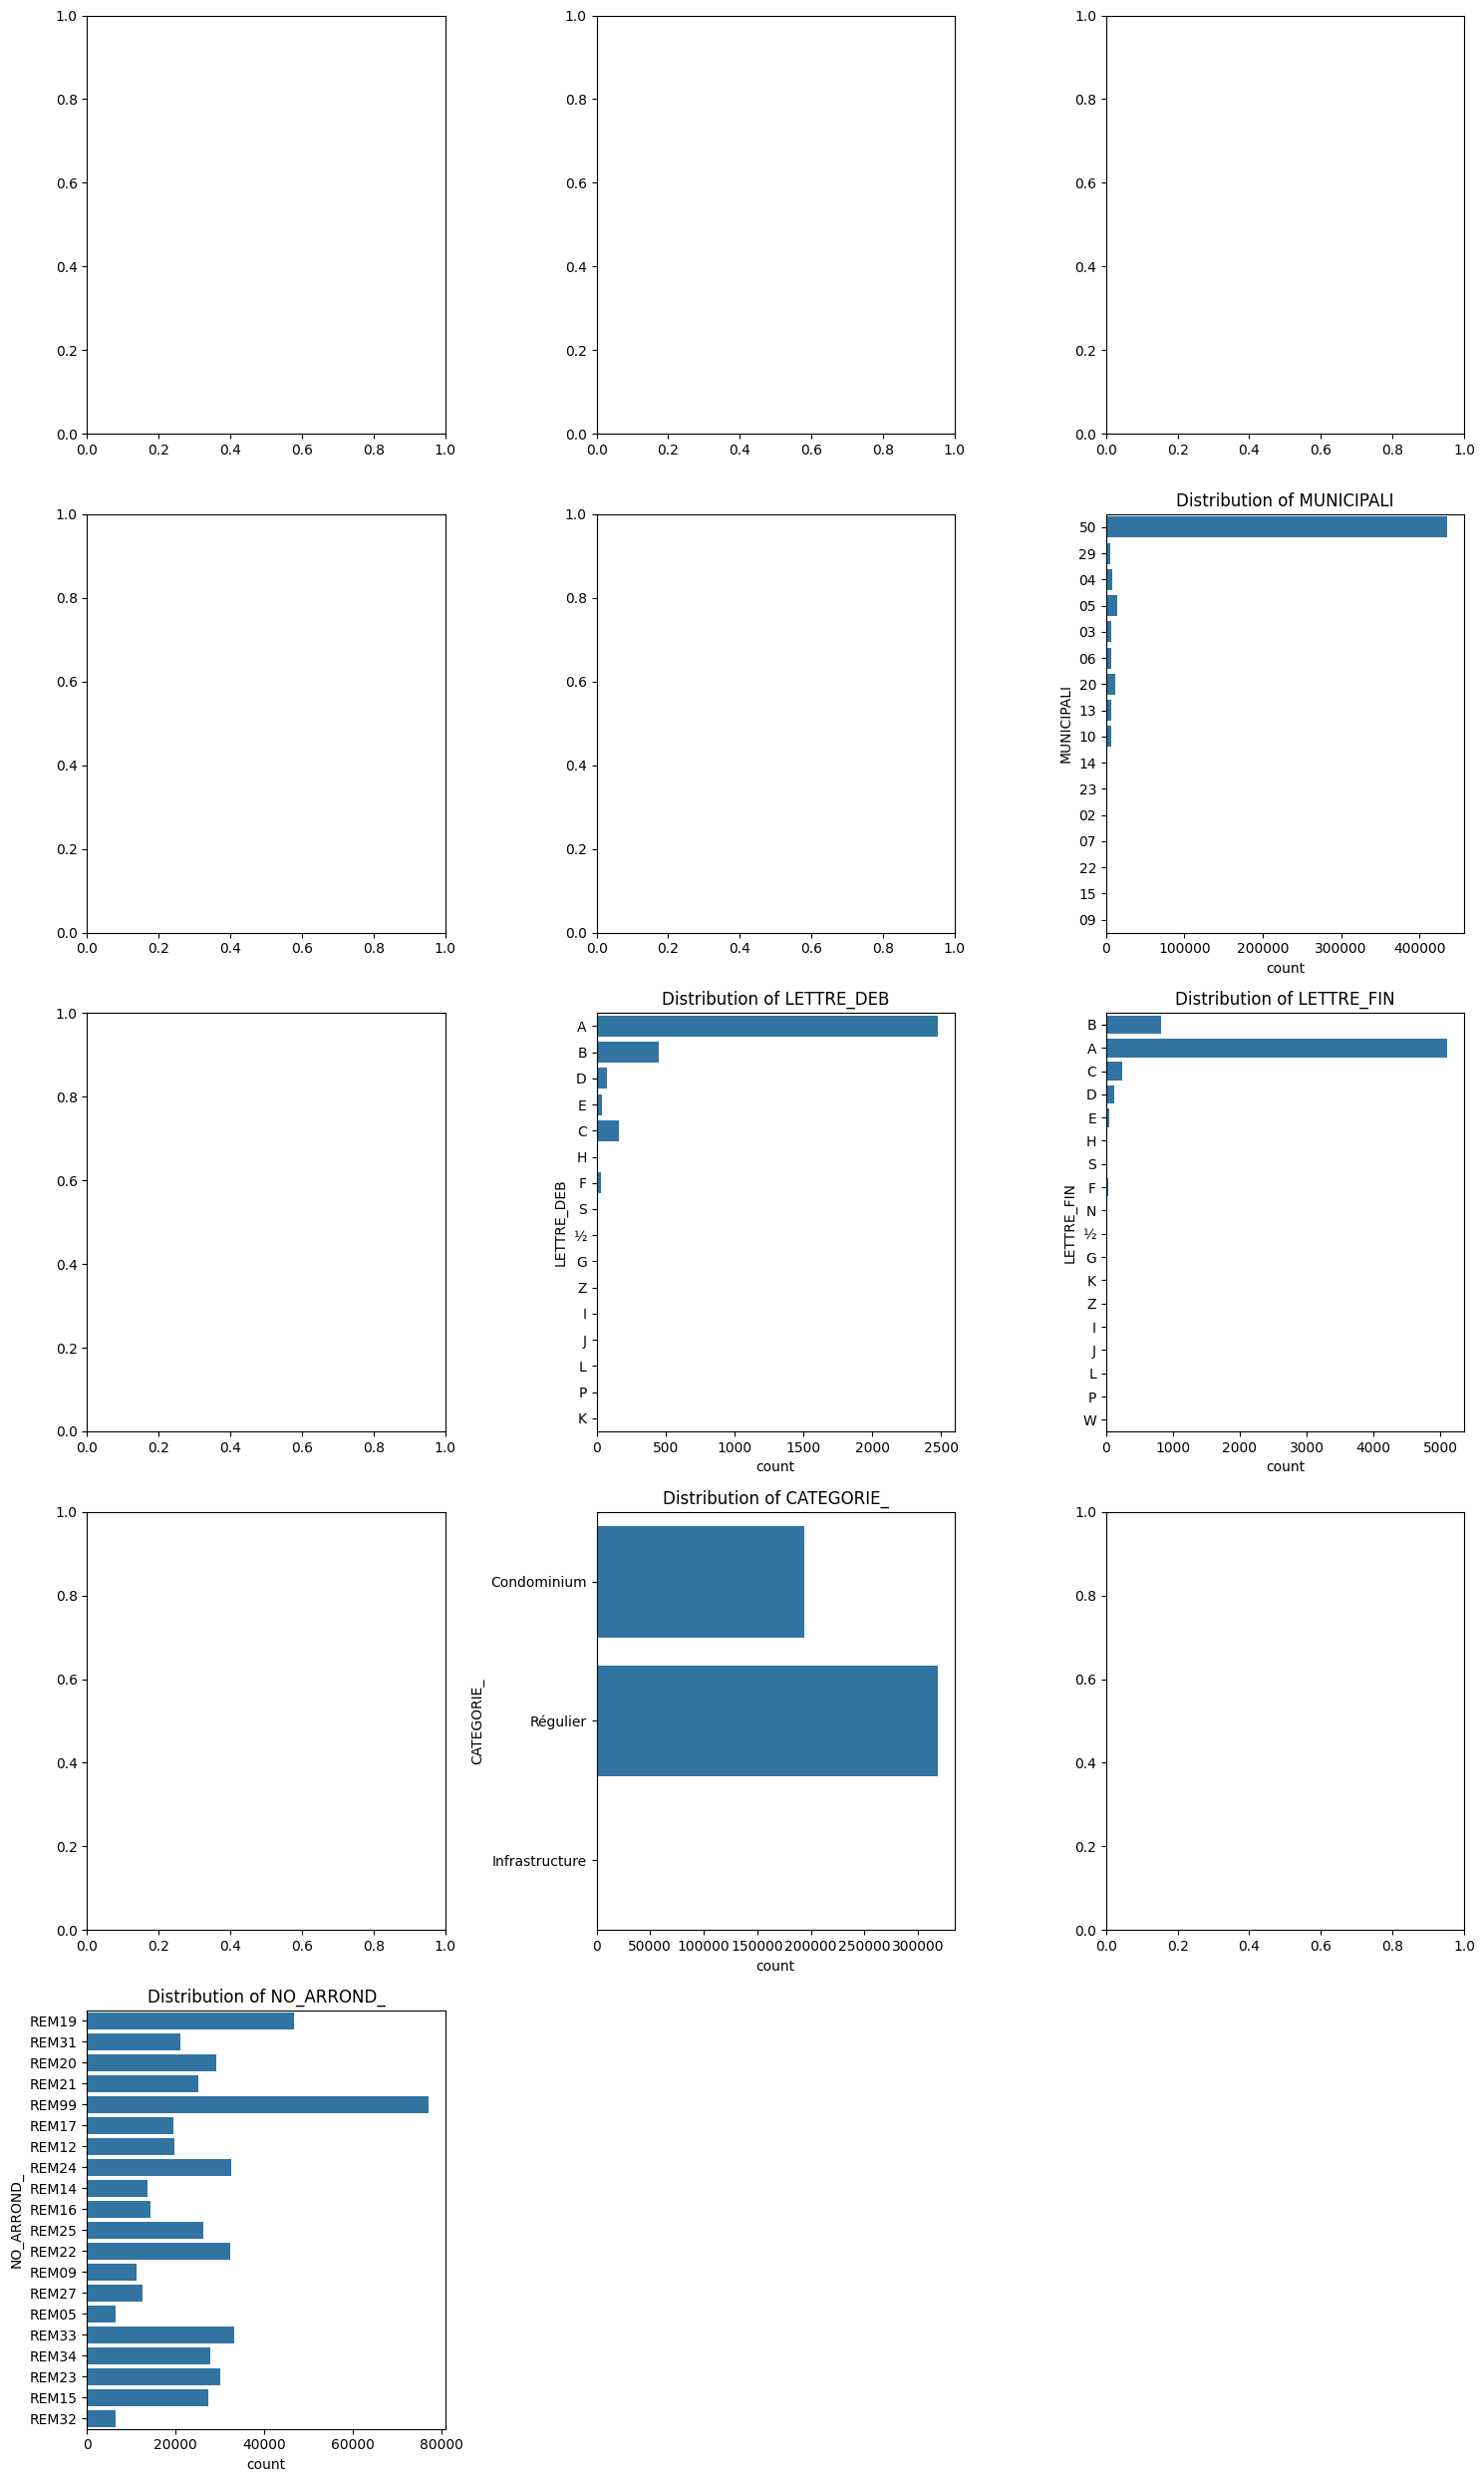

In [ ]:
# @title
# Check the data types of each column
print(uef_df.dtypes)

# Select numerical columns for distribution plotting
numerical_cols = uef_df.select_dtypes(include=np.number).columns

# Create subplots for each numerical column
num_plots = len(numerical_cols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(uef_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#For categorical columns
categorical_cols = uef_df.select_dtypes(include='object').columns

# Create subplots for each categorical column
num_plots = len(categorical_cols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if uef_df[col].nunique() < 50: #adjust number based on your data
        sns.countplot(y=col, data=uef_df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    else:
        print(f"Skipping {col} due to high cardinality")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
uef_df.columns

Index(['UEV_ID', 'CVC_START', 'CVC_END', 'STR_NAME', 'UNIT_START', 'MUNI_CODE',
       'FLRS_AGND', 'NBR_UNITS', 'CONS_YEAR', 'USE_CODE', 'L_START', 'L_END',
       'USE_DES', 'UEF_CAT', 'LR_NBR', 'LAND_A', 'BLD_AREA', 'DIST_ID',
       'geometry'],
      dtype='object')

In [ ]:
uef_df.isnull().sum()
uef_df = uef_df.drop_duplicates(keep='first')
uef_df = uef_df.dropna(subset=[STREET_NAME, CIVIC_START, CIVIC_END])
uef_df[STREET_NAME] = uef_df[STREET_NAME].str.replace(r'\(.*?\)', '', regex=True)
uef_df = uef_df.drop_duplicates(subset=[CIVIC_END, STREET_NAME, MUNICIPALITY_CODE], keep='first')

#uef_df = uef_df.dropna()
uef_df.loc[uef_df[CIVIC_END].isnull(), CIVIC_END] = 0
uef_df.loc[:, CONSTRUCTION_YEAR] = pd.to_datetime(uef_df[CONSTRUCTION_YEAR], format='%Y', errors='coerce')
uef_df.loc[:, CONSTRUCTION_YEAR] = uef_df[CONSTRUCTION_YEAR].fillna(pd.NaT)
uef_df = uef_df.dropna(subset=[CONSTRUCTION_YEAR])
uef_df.loc[:, UEF_CATEGORY] = uef_df[UEF_CATEGORY].astype('category')

<ipython-input-88-735026ac0281>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1983-01-01 00:00:00', '2012-01-01 00:00:00', '1983-01-01 00:00:00',
 '1963-01-01 00:00:00', '1914-01-01 00:00:00', '1949-01-01 00:00:00',
 '1892-01-01 00:00:00', '1929-01-01 00:00:00', '1965-01-01 00:00:00',
 '1927-01-01 00:00:00',
 ...
 '1993-01-01 00:00:00', '1992-01-01 00:00:00', '1994-01-01 00:00:00',
                 'NaT', '1962-01-01 00:00:00', '1946-01-01 00:00:00',
 '1902-01-01 00:00:00', '1983-01-01 00:00:00', '1956-01-01 00:00:00',
 '1986-01-01 00:00:00']
Length: 357346, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  uef_df.loc[:, CONSTRUCTION_YEAR] = pd.to_datetime(uef_df[CONSTRUCTION_YEAR], format='%Y', errors='coerce')


In [ ]:
municipality_mapping = {
    2: 'Baie-D\'Urfé',
    3: 'Beaconsfield',
    4: 'Côte-Saint-Luc',
    5: 'Dollard-Des Ormeaux',
    6: 'Dorval',
    7: 'Hampstead',
    10: 'Kirkland',
    9: 'L\'Île-Dorval',
    13: 'Mont-Royal',
    50: 'Montréal',
    14: 'Montréal-Est',
    15: 'Montréal-Ouest',
    20: 'Pointe-Claire',
    23: 'Sainte-Anne-de-Bellevue',
    22: 'Senneville',
    29: 'Westmount'
}

uef_df[MUNICIPALITY_CODE] = pd.to_numeric(uef_df[MUNICIPALITY_CODE], errors='coerce')

uef_df[MUNICIPALITY_NAME] = uef_df[MUNICIPALITY_CODE].map(municipality_mapping)


In [ ]:
#np.unique(uef_df.LIBELLE_UT.values)

In [ ]:
uef_df.columns

Index(['UEV_ID', 'CVC_START', 'CVC_END', 'STR_NAME', 'UNIT_START', 'MUNI_CODE',
       'FLRS_AGND', 'NBR_UNITS', 'CONS_YEAR', 'USE_CODE', 'L_START', 'L_END',
       'USE_DES', 'UEF_CAT', 'LR_NBR', 'LAND_A', 'BLD_AREA', 'DIST_ID',
       'geometry', 'MUNI_NAME'],
      dtype='object')

In [ ]:
uef_df.head()

,UEV_ID,CVC_START,CVC_END,STR_NAME,UNIT_START,MUNI_CODE,FLRS_AGND,NBR_UNITS,CONS_YEAR,USE_CODE,L_START,L_END,USE_DES,UEF_CAT,LR_NBR,LAND_A,BLD_AREA,DIST_ID,geometry,MUNI_NAME
0,01038405,3577,3577,avenue Atwater,None,50,NaN,NaN,1983-01-01,1921,None,None,Stationnement intérieur (condo),Condominium,9739-83-9737-8-001-0431,2,NaN,REM19,"POLYGON ((297829.682 5039309.256, 297830.361 5...",Montréal
1,05213144,5211,5211,rue du Sureau,105,50,1.0,1.0,2012-01-01,1000,None,None,Logement,Condominium,7941-06-3037-4-001-0004,69,68.0,REM31,"POLYGON ((279029.064 5041684.534, 279039.924 5...",Montréal
2,01036349,3550,3550,rue de la Montagne,109,50,3.0,1.0,1983-01-01,1000,None,None,Logement,Condominium,9840-31-8010-6-001-0005,133,127.0,REM19,"POLYGON ((298357.161 5040101.378, 298393.693 5...",Montréal
3,05189527,1200,1200,rue Saint-Alexandre,511,50,1.0,1.0,1963-01-01,1000,None,None,Logement,Condominium,9940-55-8522-7-001-0257,16,62.0,REM19,"POLYGON ((299541.566 5040531.245, 299550.843 5...",Montréal
4,01037334,1254,1254,rue Saint-Marc,61,50,1.0,1.0,1914-01-01,1000,None,None,Logement,Condominium,9839-51-6255-9-001-0013,16,82.0,REM19,"POLYGON ((298555.055 5039168.035, 298576.898 5...",Montréal


In [ ]:
uef_df[CONSTRUCTION_YEAR].head()

,CONS_YEAR
0,1983-01-01
1,2012-01-01
2,1983-01-01
3,1963-01-01
4,1914-01-01


In [ ]:
# create a new column to calculate building age from the CONSTRUCTION_YEAR column
uef_df[CONSTRUCTION_YEAR] = uef_df[CONSTRUCTION_YEAR].dt.year
uef_df[BUILDING_AGE] = (pd.Timestamp('now').year - uef_df[CONSTRUCTION_YEAR])
uef_df.loc[uef_df[CONSTRUCTION_YEAR] < 1600, BUILDING_AGE] = -1

In [ ]:
# Defining age group bins and plotting
age_bins = [0, 20, 50, 100, 150, 200, 250, 300, float('inf')]  # Define your bins
age_labels = ['<20', '20-50', '50-100', '100-150', '150-200', '200-250', '250-300', '>300']
uef_df[AGE_GROUP] = pd.cut(uef_df[BUILDING_AGE], bins=age_bins, labels=age_labels, right=False)

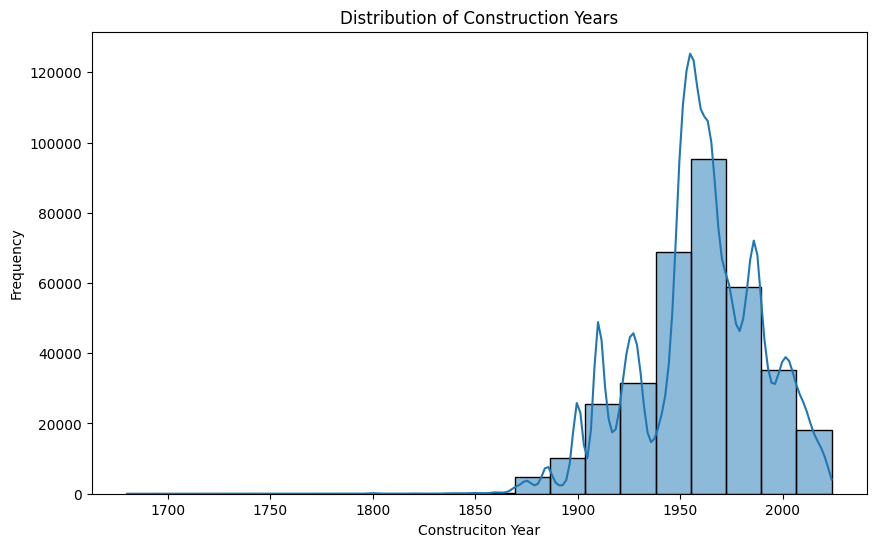

In [ ]:
# Distribution Plot with Bigger Bins
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(uef_df[CONSTRUCTION_YEAR], kde=True, bins=20)  # Increase bins for bigger binning
plt.title('Distribution of Construction Years')
plt.xlabel('Construciton Year')
plt.ylabel('Frequency')
plt.show()

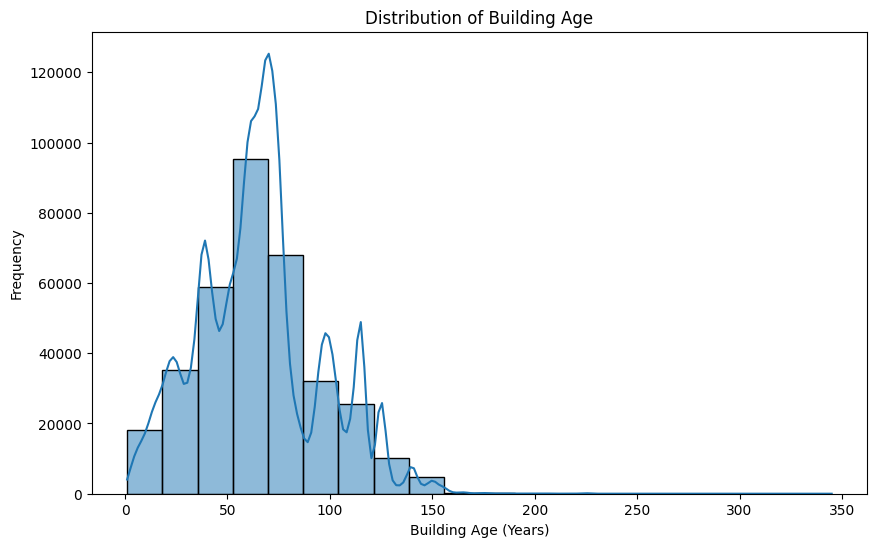

In [ ]:
# Distribution Plot with Bigger Bins
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(uef_df[BUILDING_AGE], kde=True, bins=20)  # Increase bins for bigger binning
plt.title('Distribution of Building Age')
plt.xlabel('Building Age (Years)')
plt.ylabel('Frequency')
plt.show()

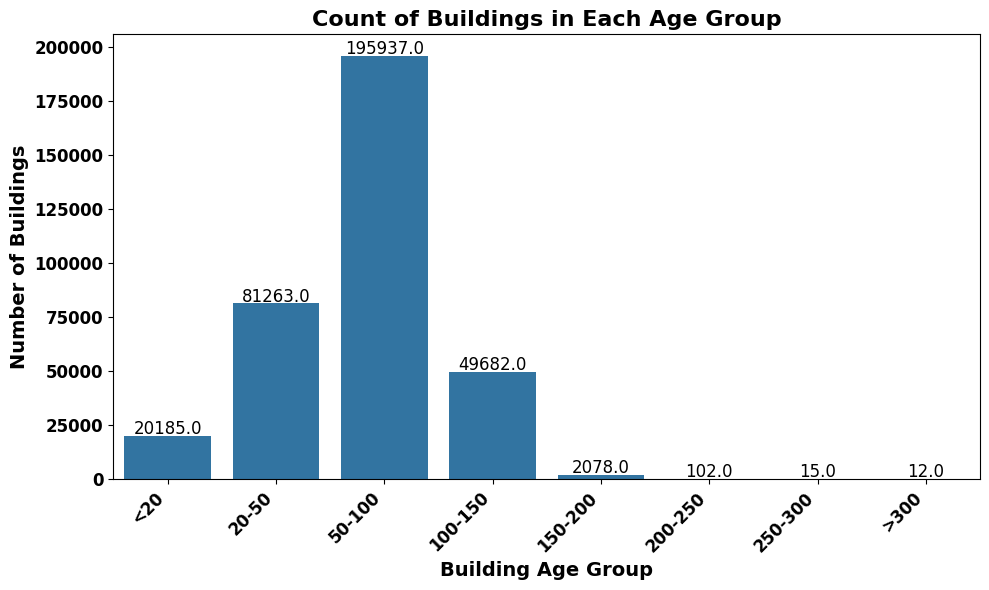

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=AGE_GROUP, data=uef_df)  # Store the countplot axes object in 'ax'
plt.title('Count of Buildings in Each Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Building Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Number of Buildings', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12, fontweight='bold')

# Add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12) # Decreased vertical offset to 5

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

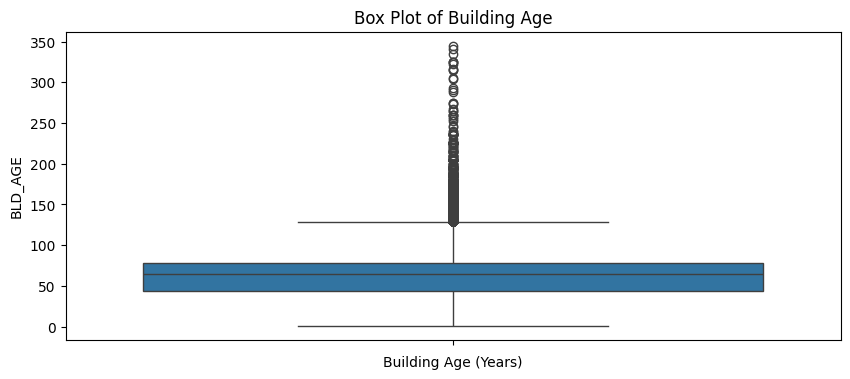

In [ ]:
# Box Plot
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
sns.boxplot(y=uef_df[BUILDING_AGE])
plt.title('Box Plot of Building Age')
plt.xlabel('Building Age (Years)')
plt.show()

In [ ]:
uef_df[BUILDING_AGE].dtype

dtype('int32')

In [ ]:
uef_df[BUILDING_AGE].head()

,BLD_AGE
0,42
1,13
2,42
3,62
4,111


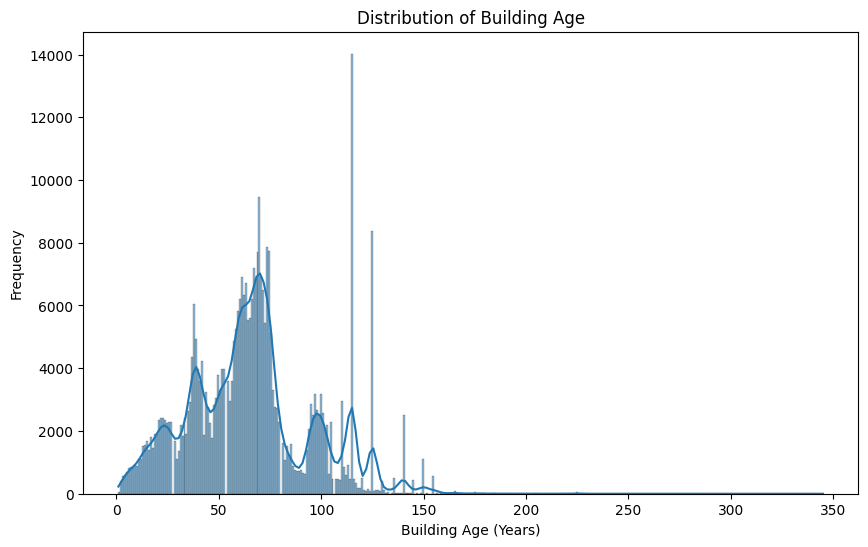

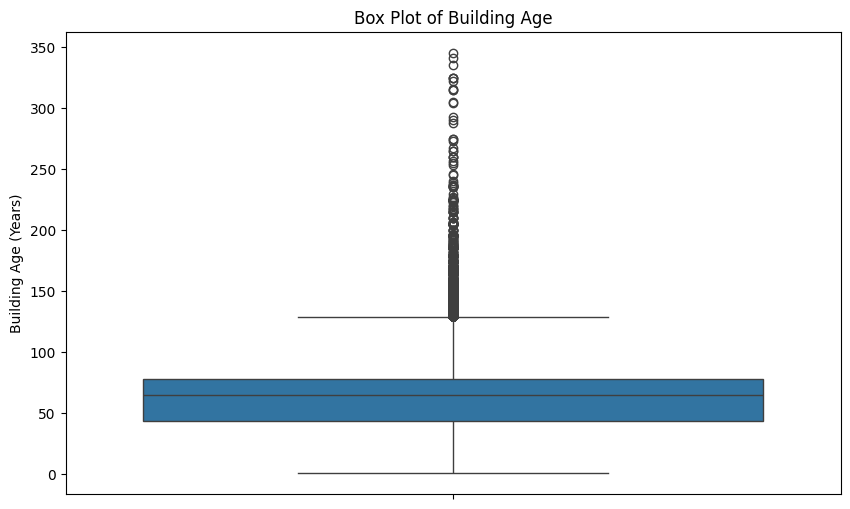

Number of outliers: 6438
Outliers:


,UEV_ID,CVC_START,CVC_END,STR_NAME,UNIT_START,MUNI_CODE,FLRS_AGND,NBR_UNITS,CONS_YEAR,USE_CODE,...,L_END,USE_DES,UEF_CAT,LR_NBR,LAND_A,BLD_AREA,DIST_ID,geometry,MUNI_NAME,BLD_AGE
6,01043207,3809,3811,rue Clark,None,50,2.0,2.0,1892,1000,...,None,Logement,Régulier,9841-86-2796-8-000-0000,128,164.0,REM21,"POLYGON ((298824.658 5041686.156, 298819.496 5...",Montréal,133
48,01005023,543,543,rue Sainte-Madeleine,None,50,2.0,1.0,1885,1000,...,None,Logement,Régulier,0037-38-3777-2-000-0000,293,221.0,REM20,"POLYGON ((300334.147 5037892.506, 300341.402 5...",Montréal,140
49,01005026,557,557,rue Sainte-Madeleine,None,50,2.0,1.0,1875,1000,...,None,Logement,Régulier,0037-38-1778-2-000-0000,136,111.0,REM20,"POLYGON ((300314.458 5037863.392, 300314.976 5...",Montréal,150
60,01000565,2086,2088,rue Jeanne-Mance,None,50,3.0,4.0,1885,1000,...,None,Logement,Régulier,9940-39-1681-2-000-0000,320,321.0,REM19,"POLYGON ((299301.291 5040966.618, 299324.244 5...",Montréal,140
63,01005355,493,493,avenue Elm,None,29,2.0,1.0,1894,1000,...,None,Logement,Régulier,9738-58-3051-4-000-0000,235,271.0,REM99,"POLYGON ((297535.489 5038866.646, 297541.989 5...",Westmount,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510252,01021278,1720,1726,rue Saint-Denis,None,50,3.0,1.0,1893,1000,...,None,Logement,Régulier,9941-77-3516-6-000-0000,1117,1034.0,REM19,"POLYGON ((299758.599 5041730.991, 299731.953 5...",Montréal,132
510928,01045323,5065,5067,rue Turcot,None,50,2.0,2.0,1885,1000,...,None,Logement,Régulier,9736-47-5886-8-000-0000,206,93.0,REM20,"POLYGON ((297464.492 5036776.479, 297446.731 5...",Montréal,140
511197,05266804,3713,3713,rue Sainte-Émilie,None,50,1.0,2.0,1880,1000,...,None,Logement,Condominium,9837-56-5615-8-000-0005,36,75.0,REM20,"POLYGON ((298543.626 5037606.221, 298555.597 5...",Montréal,145
511684,01045631,4285,4285,rue Saint-Jacques,None,50,3.0,6.0,1895,1000,...,None,Logement,Régulier,9737-84-7041-9-000-0000,343,379.0,REM20,"POLYGON ((297886.771 5037431.739, 297877.256 5...",Montréal,130


In [ ]:
# Distribution plot of building age
plt.figure(figsize=(10, 6))
sns.histplot(uef_df[BUILDING_AGE], kde=True)
plt.title('Distribution of Building Age')
plt.xlabel('Building Age (Years)')
plt.ylabel('Frequency')
plt.show()

# Box plot of building age
plt.figure(figsize=(10, 6))
sns.boxplot(y=uef_df[BUILDING_AGE])
plt.title('Box Plot of Building Age')
plt.ylabel('Building Age (Years)')
plt.show()

# Identify outliers using IQR method
Q1 = uef_df[BUILDING_AGE].quantile(0.25)
Q3 = uef_df[BUILDING_AGE].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = uef_df[(uef_df[BUILDING_AGE] < lower_bound) | (uef_df[BUILDING_AGE] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print("Outliers:")
outliers


In [ ]:
# Count buildings with age -1
count = len(uef_df[uef_df[BUILDING_AGE] == -1])

# Print the count
print(f"Number of buildings with age -1: {count}")

Number of buildings with age -1: 0


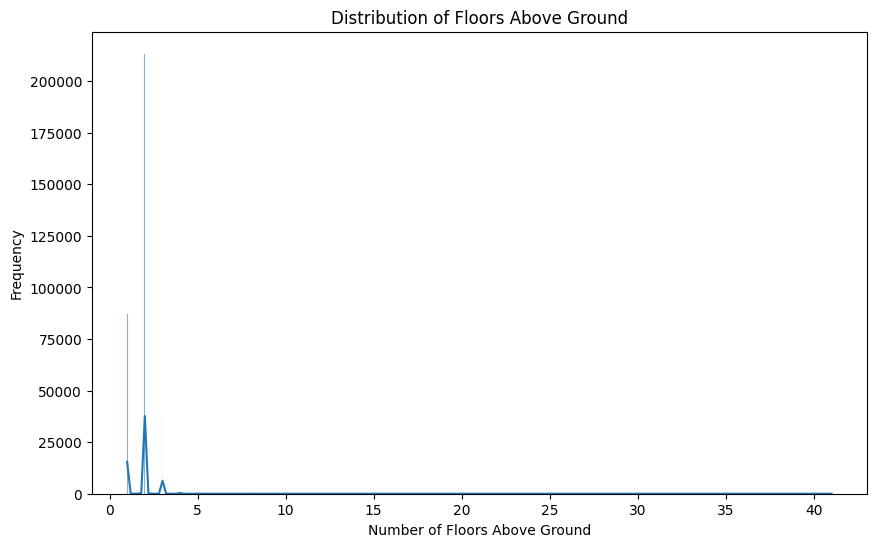

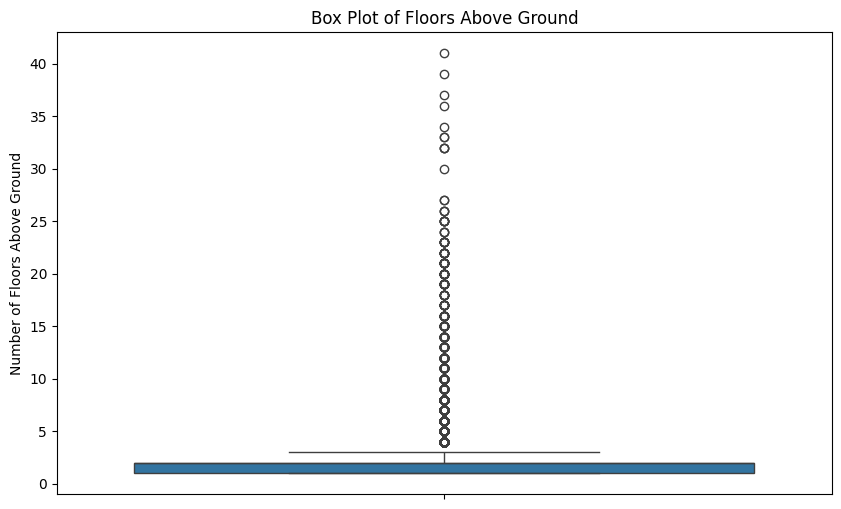

In [ ]:
# Distribution Plot of FLOORS_ABOVE_GROUND
plt.figure(figsize=(10, 6))
sns.histplot(uef_df[FLOORS_ABOVE_GROUND], kde=True)
plt.title('Distribution of Floors Above Ground')
plt.xlabel('Number of Floors Above Ground')
plt.ylabel('Frequency')
plt.show()

# Box Plot of FLOORS_ABOVE_GROUND
plt.figure(figsize=(10, 6))
sns.boxplot(y=uef_df[FLOORS_ABOVE_GROUND])
plt.title('Box Plot of Floors Above Ground')
plt.ylabel('Number of Floors Above Ground')
plt.show()

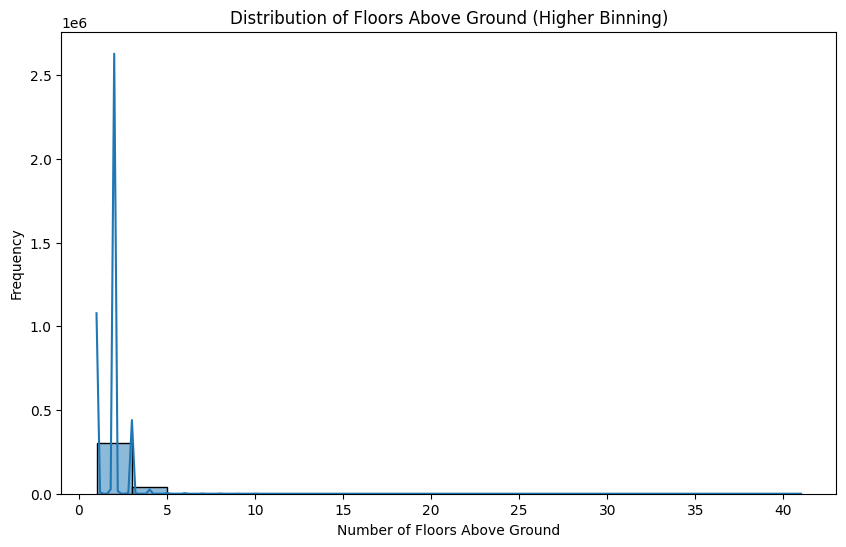

In [ ]:
# Distribution Plot of FLOORS_ABOVE_GROUND with higher binning
plt.figure(figsize=(10, 6))
sns.histplot(uef_df[FLOORS_ABOVE_GROUND], kde=True, bins=20)  # Increased bins
plt.title('Distribution of Floors Above Ground (Higher Binning)')
plt.xlabel('Number of Floors Above Ground')
plt.ylabel('Frequency')
plt.show()


In [ ]:
uef_df.head()

,UEV_ID,CVC_START,CVC_END,STR_NAME,UNIT_START,MUNI_CODE,FLRS_AGND,NBR_UNITS,CONS_YEAR,USE_CODE,...,L_END,USE_DES,UEF_CAT,LR_NBR,LAND_A,BLD_AREA,DIST_ID,geometry,MUNI_NAME,BLD_AGE
0,01038405,3577,3577,avenue Atwater,None,50,NaN,NaN,1983,1921,...,None,Stationnement intérieur (condo),Condominium,9739-83-9737-8-001-0431,2,NaN,REM19,"POLYGON ((297829.682 5039309.256, 297830.361 5...",Montréal,42
1,05213144,5211,5211,rue du Sureau,105,50,1.0,1.0,2012,1000,...,None,Logement,Condominium,7941-06-3037-4-001-0004,69,68.0,REM31,"POLYGON ((279029.064 5041684.534, 279039.924 5...",Montréal,13
2,01036349,3550,3550,rue de la Montagne,109,50,3.0,1.0,1983,1000,...,None,Logement,Condominium,9840-31-8010-6-001-0005,133,127.0,REM19,"POLYGON ((298357.161 5040101.378, 298393.693 5...",Montréal,42
3,05189527,1200,1200,rue Saint-Alexandre,511,50,1.0,1.0,1963,1000,...,None,Logement,Condominium,9940-55-8522-7-001-0257,16,62.0,REM19,"POLYGON ((299541.566 5040531.245, 299550.843 5...",Montréal,62
4,01037334,1254,1254,rue Saint-Marc,61,50,1.0,1.0,1914,1000,...,None,Logement,Condominium,9839-51-6255-9-001-0013,16,82.0,REM19,"POLYGON ((298555.055 5039168.035, 298576.898 5...",Montréal,111


<Axes: >

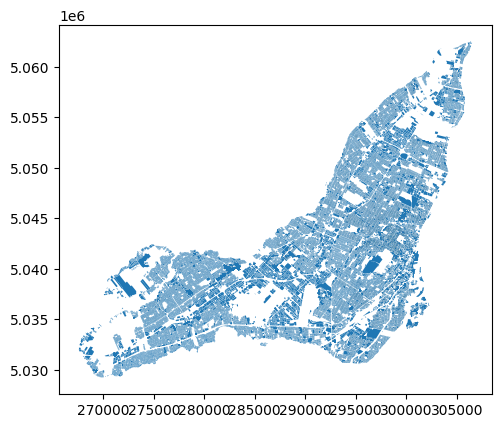

In [ ]:
uef_df.plot()

In [ ]:
print(uef_df.isnull().sum())


UEV_ID             0
CVC_START          0
CVC_END            0
STR_NAME           0
UNIT_START    342897
MUNI_CODE          0
FLRS_AGND       9187
NBR_UNITS      15022
CONS_YEAR          0
USE_CODE           0
L_START       347475
L_END         344528
USE_DES            0
UEF_CAT            0
LR_NBR             0
LAND_A             0
BLD_AREA        2583
DIST_ID            0
geometry           0
MUNI_NAME          0
BLD_AGE            0
AGE_GR             0
dtype: int64


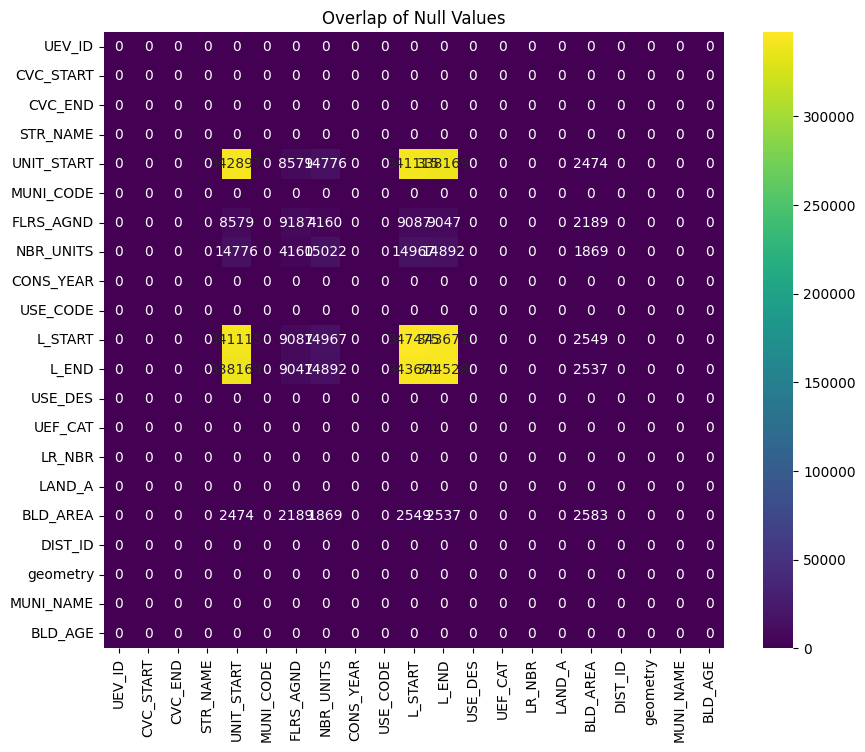

In [ ]:
# Create a subset DataFrame with only the columns to check
cols_to_check = uef_df.columns
subset_df = uef_df[cols_to_check]

# Create a heatmap showing the overlap of null values
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(subset_df.isnull().astype(int).T.dot(subset_df.isnull().astype(int)),
            cmap="viridis", annot=True, fmt="d",
            xticklabels=cols_to_check, yticklabels=cols_to_check)
plt.title("Overlap of Null Values")
plt.show()

In [ ]:
# Drop duplicates based on all columns, keeping the first occurrence
uef_df = uef_df.drop_duplicates(keep='first')


In [ ]:
len(uef_df)

349274

In [ ]:
#unique_uses = uef_df[['USE_CODE', 'USE_DESCRIPTION']].drop_duplicates()
#unique_uses.to_excel('USE_CODE_DESCRIPTION.xlsx', index=False)

In [ ]:
# Used copilot to generate a simpler categorization of USE DESCRIPTION
try:
    df_use_codes = pd.read_excel('USE_CODE_DESCRIPTION_Categorized.xlsx')
    print(df_use_codes.head())
except FileNotFoundError:
    print("Error: 'USE_CODE_DESCRIPTION_categorized.xlsx' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

df_use_codes = df_use_codes.rename(columns={'Category': USE_CATEGORY})


   USE_CODE                  USE_DESCRIPTION     Category
0      1921  Stationnement intérieur (condo)        Other
1      1000                         Logement  Residential
2      5010              Immeuble commercial   Commercial
3      1922  Stationnement extérieur (condo)        Other
4      6000               Immeuble à bureaux       Office


In [ ]:
df_use_codes.head()

,USE_CODE,USE_DESCRIPTION,USE_CAT
0,1921,Stationnement intérieur (condo),Other
1,1000,Logement,Residential
2,5010,Immeuble commercial,Commercial
3,1922,Stationnement extérieur (condo),Other
4,6000,Immeuble à bureaux,Office


In [ ]:
uef_df[USE_CODE] = pd.to_numeric(uef_df[USE_CODE], errors='coerce')

try:
    uef_df = pd.merge(uef_df, df_use_codes, on=USE_CODE, how='left')
    #uef_df_merges = pd.merge(uef_df, df_use_codes, on=['USE_CODE', 'USE_DESCRIPTION'], how='left')
    print(uef_df.head())
except KeyError:
    print("Error: 'USE_CODE' column not found in one or both DataFrames.")
except Exception as e:
    print(f"An error occurred during the merge: {e}")


     UEV_ID CVC_START CVC_END               STR_NAME UNIT_START  MUNI_CODE  \
0  01038405      3577    3577       avenue Atwater         None         50   
1  05213144      5211    5211        rue du Sureau          105         50   
2  01036349      3550    3550   rue de la Montagne          109         50   
3  05189527      1200    1200  rue Saint-Alexandre          511         50   
4  01037334      1254    1254       rue Saint-Marc           61         50   

   FLRS_AGND  NBR_UNITS  CONS_YEAR  USE_CODE  ...                   LR_NBR  \
0        NaN        NaN       1983      1921  ...  9739-83-9737-8-001-0431   
1        1.0        1.0       2012      1000  ...  7941-06-3037-4-001-0004   
2        3.0        1.0       1983      1000  ...  9840-31-8010-6-001-0005   
3        1.0        1.0       1963      1000  ...  9940-55-8522-7-001-0257   
4        1.0        1.0       1914      1000  ...  9839-51-6255-9-001-0013   

  LAND_A BLD_AREA DIST_ID                                     

In [ ]:
uef_df.columns

Index(['UEV_ID', 'CVC_START', 'CVC_END', 'STR_NAME', 'UNIT_START', 'MUNI_CODE',
       'FLRS_AGND', 'NBR_UNITS', 'CONS_YEAR', 'USE_CODE', 'L_START', 'L_END',
       'USE_DES', 'UEF_CAT', 'LR_NBR', 'LAND_A', 'BLD_AREA', 'DIST_ID',
       'geometry', 'MUNI_NAME', 'BLD_AGE', 'AGE_GR', 'USE_DESCRIPTION',
       'USE_CAT'],
      dtype='object')

In [ ]:
uef_df = uef_df.drop(columns=['USE_DESCRIPTION'])

In [ ]:
uef_df.head()

,UEV_ID,CVC_START,CVC_END,STR_NAME,UNIT_START,MUNI_CODE,FLRS_AGND,NBR_UNITS,CONS_YEAR,USE_CODE,...,USE_DES,UEF_CAT,LR_NBR,LAND_A,BLD_AREA,DIST_ID,geometry,MUNI_NAME,BLD_AGE,USE_CAT
0,01038405,3577,3577,avenue Atwater,None,50,NaN,NaN,1983,1921,...,Stationnement intérieur (condo),Condominium,9739-83-9737-8-001-0431,2,NaN,REM19,"POLYGON ((297829.682 5039309.256, 297830.361 5...",Montréal,42,Other
1,05213144,5211,5211,rue du Sureau,105,50,1.0,1.0,2012,1000,...,Logement,Condominium,7941-06-3037-4-001-0004,69,68.0,REM31,"POLYGON ((279029.064 5041684.534, 279039.924 5...",Montréal,13,Residential
2,01036349,3550,3550,rue de la Montagne,109,50,3.0,1.0,1983,1000,...,Logement,Condominium,9840-31-8010-6-001-0005,133,127.0,REM19,"POLYGON ((298357.161 5040101.378, 298393.693 5...",Montréal,42,Residential
3,05189527,1200,1200,rue Saint-Alexandre,511,50,1.0,1.0,1963,1000,...,Logement,Condominium,9940-55-8522-7-001-0257,16,62.0,REM19,"POLYGON ((299541.566 5040531.245, 299550.843 5...",Montréal,62,Residential
4,01037334,1254,1254,rue Saint-Marc,61,50,1.0,1.0,1914,1000,...,Logement,Condominium,9839-51-6255-9-001-0013,16,82.0,REM19,"POLYGON ((298555.055 5039168.035, 298576.898 5...",Montréal,111,Residential


In [ ]:
uef_df[BUILDING_AGE] = pd.to_numeric(uef_df[BUILDING_AGE], errors='coerce')
uef_df[FLOORS_ABOVE_GROUND] = pd.to_numeric(uef_df[FLOORS_ABOVE_GROUND], errors='coerce')

In [ ]:
uef_df.columns

Index(['UEV_ID', 'CVC_START', 'CVC_END', 'STR_NAME', 'UNIT_START', 'MUNI_CODE',
       'FLRS_AGND', 'NBR_UNITS', 'CONS_YEAR', 'USE_CODE', 'L_START', 'L_END',
       'USE_DES', 'UEF_CAT', 'LR_NBR', 'LAND_A', 'BLD_AREA', 'DIST_ID',
       'geometry', 'MUNI_NAME', 'BLD_AGE', 'USE_CAT'],
      dtype='object')

In [ ]:
uef_df[UEF_CATEGORY].head()

,UEF_CAT
0,Condominium
1,Condominium
2,Condominium
3,Condominium
4,Condominium


In [ ]:
uef_df[BUILDING_AGE].describe()

,BLD_AGE
count,349274.000000
mean,65.370543
std,29.975379
min,1.000000
25%,44.000000
50%,65.000000
75%,78.000000
max,345.000000


In [ ]:
uef_df.head()

,UEV_ID,CIVIC_START,CIVIC_END,STREET_NAME,UNIT_NUMBER_START,MUNICIPALITY_CODE,FLOORS_ABOVE_GROUND,NUMBER_OF_UNITS,CONSTRUCTION_YEAR,USE_CODE,...,USE_DESCRIPTION,UEF_CATEGORY,LAND_ROLL_NUMBER,LAND_AREA,BUILDING_AREA,DISTRICT_ID,geometry,MUNICIPALITY_NAME,BUILDING_AGE,USE_CAT
0,01038405,3577,3577,avenue Atwater,None,50,NaN,NaN,1983-01-01,1921,...,Stationnement intérieur (condo),Condominium,9739-83-9737-8-001-0431,2,NaN,REM19,"POLYGON ((297829.682 5039309.256, 297830.361 5...",Montréal,42,Other
1,05213144,5211,5211,rue du Sureau,105,50,1.0,1.0,2012-01-01,1000,...,Logement,Condominium,7941-06-3037-4-001-0004,69,68.0,REM31,"POLYGON ((279029.064 5041684.534, 279039.924 5...",Montréal,13,Residential
2,01036349,3550,3550,rue de la Montagne,109,50,3.0,1.0,1983-01-01,1000,...,Logement,Condominium,9840-31-8010-6-001-0005,133,127.0,REM19,"POLYGON ((298357.161 5040101.378, 298393.693 5...",Montréal,42,Residential
3,05189527,1200,1200,rue Saint-Alexandre,511,50,1.0,1.0,1963-01-01,1000,...,Logement,Condominium,9940-55-8522-7-001-0257,16,62.0,REM19,"POLYGON ((299541.566 5040531.245, 299550.843 5...",Montréal,62,Residential
4,01037334,1254,1254,rue Saint-Marc,61,50,1.0,1.0,1914-01-01,1000,...,Logement,Condominium,9839-51-6255-9-001-0013,16,82.0,REM19,"POLYGON ((298555.055 5039168.035, 298576.898 5...",Montréal,111,Residential


In [ ]:
uef_df.dtypes

,0
UEV_ID,object
CVC_START,object
CVC_END,object
STR_NAME,object
UNIT_START,object
MUNI_CODE,int64
FLRS_AGND,float64
NBR_UNITS,float64
CONS_YEAR,int32
USE_CODE,int64


In [ ]:
uef_df.isnull().sum()

,0
UEV_ID,0
CVC_START,0
CVC_END,0
STR_NAME,0
UNIT_START,342897
MUNI_CODE,0
FLRS_AGND,9187
NBR_UNITS,15022
CONS_YEAR,0
USE_CODE,0


In [ ]:
uef_df[BUILDING_AGE] = uef_df[BUILDING_AGE].astype(np.int32)  # or float
uef_df[BUILDING_AGE] = uef_df[BUILDING_AGE].fillna(-1)  # Replace NaN with -1
#uef_df = uef_df.dropna(subset=['BUILDING_AGE'])  # Remove rows with NaN in 'BUILDING_AGE'

In [ ]:
# Replace NaN with -1 in 'FLOORS_ABOVE_GROUND' before conversion
uef_df[FLOORS_ABOVE_GROUND] = uef_df[FLOORS_ABOVE_GROUND].fillna(-1)
# Now, convert to int32
uef_df[FLOORS_ABOVE_GROUND] = uef_df[FLOORS_ABOVE_GROUND].astype(np.int32)
uef_df[MUNICIPALITY_CODE] = uef_df[MUNICIPALITY_CODE].astype(np.int32)  # or float
uef_df[LAND_AREA] = uef_df[LAND_AREA].astype(np.int32)  # or float
uef_df[BUILDING_AREA] = uef_df[BUILDING_AREA].astype(np.float32)  # or float
uef_df[NUMBER_OF_UNITS] = uef_df[NUMBER_OF_UNITS].fillna(-1)
# Now, convert to int32
uef_df[NUMBER_OF_UNITS] = uef_df[NUMBER_OF_UNITS].astype(np.int32)

In [ ]:
uef_df[USE_CODE] = uef_df[USE_CODE].astype(np.int32)

In [ ]:
uef_df.head()

,UEV_ID,CVC_START,CVC_END,STR_NAME,UNIT_START,MUNI_CODE,FLRS_AGND,NBR_UNITS,CONS_YEAR,USE_CODE,...,L_END,USE_DES,UEF_CAT,LR_NBR,LAND_A,BLD_AREA,DIST_ID,geometry,MUNI_NAME,BLD_AGE
0,01038405,3577,3577,avenue Atwater,None,50,-1,-1,1983,1921,...,None,Stationnement intérieur (condo),Condominium,9739-83-9737-8-001-0431,2,NaN,REM19,"POLYGON ((-73.58918 45.49367, -73.58917 45.493...",Montréal,42
1,05213144,5211,5211,rue du Sureau,105,50,1,1,2012,1000,...,None,Logement,Condominium,7941-06-3037-4-001-0004,69,68.0,REM31,"POLYGON ((-73.82985 45.5146, -73.82971 45.5144...",Montréal,13
2,01036349,3550,3550,rue de la Montagne,109,50,3,1,1983,1000,...,None,Logement,Condominium,9840-31-8010-6-001-0005,133,127.0,REM19,"POLYGON ((-73.58244 45.5008, -73.58198 45.5011...",Montréal,42
3,05189527,1200,1200,rue Saint-Alexandre,511,50,1,1,1963,1000,...,None,Logement,Condominium,9940-55-8522-7-001-0257,16,62.0,REM19,"POLYGON ((-73.56729 45.50468, -73.56717 45.504...",Montréal,62
4,01037334,1254,1254,rue Saint-Marc,61,50,1,1,1914,1000,...,None,Logement,Condominium,9839-51-6255-9-001-0013,16,82.0,REM19,"POLYGON ((-73.5799 45.49241, -73.57962 45.4922...",Montréal,111


In [ ]:
uef_df.crs

<Projected CRS: EPSG:32188>
Name: NAD83 / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
uef_df.to_crs(epsg=4326, inplace=True)

In [ ]:
uef_df.columns

Index(['UEV_ID', 'CVC_START', 'CVC_END', 'STR_NAME', 'UNIT_START', 'MUNI_CODE',
       'FLRS_AGND', 'NBR_UNITS', 'CONS_YEAR', 'USE_CODE', 'L_START', 'L_END',
       'USE_DES', 'UEF_CAT', 'LR_NBR', 'LAND_A', 'BLD_AREA', 'DIST_ID',
       'geometry', 'MUNI_NAME', 'BLD_AGE', 'AGE_GR', 'USE_CAT'],
      dtype='object')

In [ ]:
# Keep only the specified columns
columns_to_keep = [UEV_ID, CIVIC_START, STREET_NAME, MUNICIPALITY_CODE, MUNICIPALITY_NAME,
                   DISTRICT_ID, FLOORS_ABOVE_GROUND, NUMBER_OF_UNITS, USE_CODE,
                   USE_DESCRIPTION, USE_CATEGORY, CONSTRUCTION_YEAR, BUILDING_AGE, AGE_GROUP,
                   BUILDING_AREA, GEOMETRY]
uef_df_saved = uef_df[columns_to_keep]
uef_df_saved.head()


,UEV_ID,CVC_START,STR_NAME,MUNI_CODE,MUNI_NAME,DIST_ID,FLRS_AGND,NBR_UNITS,USE_CODE,USE_DES,USE_CAT,CONS_YEAR,BLD_AGE,AGE_GR,BLD_AREA,geometry
0,01038405,3577,avenue Atwater,50,Montréal,REM19,-1,-1,1921,Stationnement intérieur (condo),Other,1983,42,20-50,NaN,"POLYGON ((-73.58918 45.49367, -73.58917 45.493..."
1,05213144,5211,rue du Sureau,50,Montréal,REM31,1,1,1000,Logement,Residential,2012,13,<20,68.0,"POLYGON ((-73.82985 45.5146, -73.82971 45.5144..."
2,01036349,3550,rue de la Montagne,50,Montréal,REM19,3,1,1000,Logement,Residential,1983,42,20-50,127.0,"POLYGON ((-73.58244 45.5008, -73.58198 45.5011..."
3,05189527,1200,rue Saint-Alexandre,50,Montréal,REM19,1,1,1000,Logement,Residential,1963,62,50-100,62.0,"POLYGON ((-73.56729 45.50468, -73.56717 45.504..."
4,01037334,1254,rue Saint-Marc,50,Montréal,REM19,1,1,1000,Logement,Residential,1914,111,100-150,82.0,"POLYGON ((-73.5799 45.49241, -73.57962 45.4922..."


In [ ]:
uef_df_saved.describe()

,MUNI_CODE,FLRS_AGND,NBR_UNITS,USE_CODE,CONS_YEAR,BLD_AGE,BLD_AREA
count,349274.000000,349274.000000,349274.000000,349274.000000,349274.000000,349274.000000,346691.000000
mean,43.019586,1.814885,2.420796,1185.501683,1959.629457,65.370543,364.054779
std,15.374661,0.936059,9.040810,902.870639,29.975379,29.975379,2418.303711
min,2.000000,-1.000000,-1.000000,1000.000000,1680.000000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,1000.000000,1947.000000,44.000000,124.000000
50%,50.000000,2.000000,1.000000,1000.000000,1960.000000,65.000000,187.000000
75%,50.000000,2.000000,2.000000,1000.000000,1981.000000,78.000000,256.000000
max,50.000000,41.000000,1351.000000,9520.000000,2024.000000,345.000000,947140.000000


In [ ]:
def lower_case_dataframe(df):
  """Lower cases all string columns in a Pandas DataFrame.

  Args:
    df: The input DataFrame.

  Returns:
    A new DataFrame with string columns lowercased.
    Returns the original DataFrame if no string columns are found.
  """

  # Find string columns
  string_cols = df.select_dtypes(include=['object']).columns

  if not string_cols.empty:
    # Create a copy to avoid modifying the original DataFrame
    df_lower = df.copy()

    # Apply lowercasing to each string column
    for col in string_cols:
      df_lower[col] = df_lower[col].str.lower()

    return df_lower
  else:
    return df # Return original if no string columns

# Example usage (assuming 'uef_df' is your DataFrame):
uef_df_lower = lower_case_dataframe(uef_df_saved)
print(uef_df_lower.head())


     UEV_ID CVC_START               STR_NAME  MUNI_CODE MUNI_NAME DIST_ID  \
0  01038405      3577       avenue atwater           50  montréal   rem19   
1  05213144      5211        rue du sureau           50  montréal   rem31   
2  01036349      3550   rue de la montagne           50  montréal   rem19   
3  05189527      1200  rue saint-alexandre           50  montréal   rem19   
4  01037334      1254       rue saint-marc           50  montréal   rem19   

   FLRS_AGND  NBR_UNITS  USE_CODE                          USE_DES  \
0         -1         -1      1921  stationnement intérieur (condo)   
1          1          1      1000                         logement   
2          3          1      1000                         logement   
3          1          1      1000                         logement   
4          1          1      1000                         logement   

       USE_CAT  CONS_YEAR  BLD_AGE   AGE_GR  BLD_AREA  \
0        other       1983       42    20-50       NaN   
1 

In [ ]:
uef_df_saved = uef_df_lower

In [ ]:
uef_df_saved.head()

,UEV_ID,CVC_START,STR_NAME,MUNI_CODE,MUNI_NAME,DIST_ID,FLRS_AGND,NBR_UNITS,USE_CODE,USE_DES,USE_CAT,CONS_YEAR,BLD_AGE,AGE_GR,BLD_AREA,geometry
0,01038405,3577,avenue atwater,50,montréal,rem19,-1,-1,1921,stationnement intérieur (condo),other,1983,42,20-50,NaN,"POLYGON ((-73.58918 45.49367, -73.58917 45.493..."
1,05213144,5211,rue du sureau,50,montréal,rem31,1,1,1000,logement,residential,2012,13,<20,68.0,"POLYGON ((-73.82985 45.5146, -73.82971 45.5144..."
2,01036349,3550,rue de la montagne,50,montréal,rem19,3,1,1000,logement,residential,1983,42,20-50,127.0,"POLYGON ((-73.58244 45.5008, -73.58198 45.5011..."
3,05189527,1200,rue saint-alexandre,50,montréal,rem19,1,1,1000,logement,residential,1963,62,50-100,62.0,"POLYGON ((-73.56729 45.50468, -73.56717 45.504..."
4,01037334,1254,rue saint-marc,50,montréal,rem19,1,1,1000,logement,residential,1914,111,100-150,82.0,"POLYGON ((-73.5799 45.49241, -73.57962 45.4922..."


In [ ]:
output_shp_path = f"{Base_Path}/property_assessment_cleaned/property_assessment_cleaned.shp"

uef_df_saved.to_file(output_shp_path, driver='ESRI Shapefile', encoding='utf-8')

In [ ]:
output_shp_path = "property_assessment_cleaned.shp"

uef_df_saved.to_file(output_shp_path, driver='ESRI Shapefile', encoding='utf-8')

In [ ]:
from google.colab import files

files.download('property_assessment_cleaned.shp')
files.download('property_assessment_cleaned.cpg')
files.download('property_assessment_cleaned.dbf')
files.download('property_assessment_cleaned.prj')
files.download('property_assessment_cleaned.shx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>